In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_excel('Online retail.xlsx',header=None)

In [3]:
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [4]:
column_name=['Items']

In [5]:
df.columns=column_name

In [6]:
df['Items']=df['Items'].apply(lambda x: x.split(','))

In [7]:
te=TransactionEncoder()

In [8]:
te_array=te.fit(df['Items']).transform(df['Items'])

In [9]:
df_encoded=pd.DataFrame(te_array,columns=te.columns_)

In [10]:
df1=df_encoded.astype('int')

In [11]:
df1

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df1.duplicated().sum()

2347

In [13]:
df1[df1.duplicated()]

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_clean=df1.drop_duplicates(keep='first')

In [15]:
df_clean

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
frequent_itemsets=apriori(df_clean,min_support=0.01,use_colnames=True)

In [17]:
frequent_itemsets

,support,itemsets
0,0.029492,(almonds)
1,0.011253,(antioxydant juice)
2,0.046178,(avocado)
3,0.012612,(bacon)
4,0.015522,(barbecue sauce)
...,...,...
433,0.014746,"(spaghetti, olive oil, mineral water)"
434,0.016686,"(pancakes, spaghetti, mineral water)"
435,0.012418,"(shrimp, spaghetti, mineral water)"
436,0.010865,"(soup, spaghetti, mineral water)"


In [18]:
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.5)

In [19]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(chocolate, chicken)",(mineral water),0.021149,0.299961,0.010865,0.513761,1.712760,0.004522,1.439702,0.425138
1,"(chocolate, olive oil)",(mineral water),0.023671,0.299961,0.012029,0.508197,1.694208,0.004929,1.423412,0.419688
2,"(ground beef, eggs)",(mineral water),0.028910,0.299961,0.014552,0.503356,1.678069,0.005880,1.409538,0.416107
3,"(ground beef, frozen vegetables)",(mineral water),0.024641,0.299961,0.013388,0.543307,1.811258,0.005996,1.532844,0.459213
4,"(ground beef, frozen vegetables)",(spaghetti),0.024641,0.230113,0.012612,0.511811,2.224177,0.006941,1.577028,0.564300
5,"(ground beef, milk)",(mineral water),0.031820,0.299961,0.016104,0.506098,1.687210,0.006559,1.417363,0.420692
6,"(pancakes, ground beef)",(mineral water),0.020955,0.299961,0.010865,0.518519,1.728619,0.004580,1.453927,0.430525
7,"(olive oil, milk)",(mineral water),0.024253,0.299961,0.012418,0.512000,1.706887,0.005143,1.434506,0.424432
8,"(soup, milk)",(mineral water),0.021537,0.299961,0.012418,0.576577,1.922171,0.005957,1.653283,0.490315
9,"(soup, spaghetti)",(mineral water),0.020761,0.299961,0.010865,0.523364,1.744774,0.004638,1.468709,0.435910


In [20]:
rules1=rules[rules['lift']>2]

In [21]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,"(ground beef, frozen vegetables)",(spaghetti),0.024641,0.230113,0.012612,0.511811,2.224177,0.006941,1.577028,0.5643


In [22]:
# Identifying High-Lift Rules
rule1=rules.sort_values('lift',ascending=False)

In [23]:
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,"(ground beef, frozen vegetables)",(spaghetti),0.024641,0.230113,0.012612,0.511811,2.224177,0.006941,1.577028,0.564300
8,"(soup, milk)",(mineral water),0.021537,0.299961,0.012418,0.576577,1.922171,0.005957,1.653283,0.490315
3,"(ground beef, frozen vegetables)",(mineral water),0.024641,0.299961,0.013388,0.543307,1.811258,0.005996,1.532844,0.459213
9,"(soup, spaghetti)",(mineral water),0.020761,0.299961,0.010865,0.523364,1.744774,0.004638,1.468709,0.435910
6,"(pancakes, ground beef)",(mineral water),0.020955,0.299961,0.010865,0.518519,1.728619,0.004580,1.453927,0.430525
0,"(chocolate, chicken)",(mineral water),0.021149,0.299961,0.010865,0.513761,1.712760,0.004522,1.439702,0.425138
7,"(olive oil, milk)",(mineral water),0.024253,0.299961,0.012418,0.512000,1.706887,0.005143,1.434506,0.424432
1,"(chocolate, olive oil)",(mineral water),0.023671,0.299961,0.012029,0.508197,1.694208,0.004929,1.423412,0.419688
5,"(ground beef, milk)",(mineral water),0.031820,0.299961,0.016104,0.506098,1.687210,0.006559,1.417363,0.420692
2,"(ground beef, eggs)",(mineral water),0.028910,0.299961,0.014552,0.503356,1.678069,0.005880,1.409538,0.416107


High-lift rules indicate strong cross-selling opportunities.

In [24]:
# Identifying High-Confidence Rules
rule2=rules.sort_values('confidence',ascending=False)

In [25]:
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,"(soup, milk)",(mineral water),0.021537,0.299961,0.012418,0.576577,1.922171,0.005957,1.653283,0.490315
3,"(ground beef, frozen vegetables)",(mineral water),0.024641,0.299961,0.013388,0.543307,1.811258,0.005996,1.532844,0.459213
9,"(soup, spaghetti)",(mineral water),0.020761,0.299961,0.010865,0.523364,1.744774,0.004638,1.468709,0.435910
6,"(pancakes, ground beef)",(mineral water),0.020955,0.299961,0.010865,0.518519,1.728619,0.004580,1.453927,0.430525
0,"(chocolate, chicken)",(mineral water),0.021149,0.299961,0.010865,0.513761,1.712760,0.004522,1.439702,0.425138
7,"(olive oil, milk)",(mineral water),0.024253,0.299961,0.012418,0.512000,1.706887,0.005143,1.434506,0.424432
4,"(ground beef, frozen vegetables)",(spaghetti),0.024641,0.230113,0.012612,0.511811,2.224177,0.006941,1.577028,0.564300
1,"(chocolate, olive oil)",(mineral water),0.023671,0.299961,0.012029,0.508197,1.694208,0.004929,1.423412,0.419688
5,"(ground beef, milk)",(mineral water),0.031820,0.299961,0.016104,0.506098,1.687210,0.006559,1.417363,0.420692
2,"(ground beef, eggs)",(mineral water),0.028910,0.299961,0.014552,0.503356,1.678069,0.005880,1.409538,0.416107


Rules with high confidence suggest that when customers buy Product-A, they are very likely to buy Product-B as well. These patterns are useful for product bundling strategies.

In [26]:
# Identifying Rules with High Support
rule3=rules[rules['support']>0.015]

In [27]:
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,"(ground beef, milk)",(mineral water),0.03182,0.299961,0.016104,0.506098,1.68721,0.006559,1.417363,0.420692


High-support rules help in identifying popular combinations of items that could be essential for inventory management or promotional campaigns.

In [28]:
# Cross-Reference Metrics
rule4=rules[(rules['lift']>2)&(rules['confidence']>0.5)&(rules['support']>0.01)]

In [29]:
rule4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,"(ground beef, frozen vegetables)",(spaghetti),0.024641,0.230113,0.012612,0.511811,2.224177,0.006941,1.577028,0.5643


These rules indicate valuable combinations of products that are not only frequently bought together but also strongly associated, making them candidates for marketing strategies like cross-promotions or loyalty programs.

### Visualizing the Rules

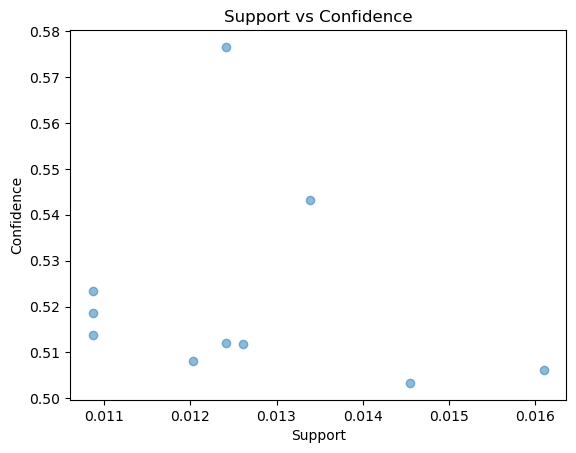

In [30]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

#### Interview Questions

1.What is lift and why is it important in Association rules?

2.What is support and Confidence. How do you calculate them?

3.What are some limitations or challenges of Association rules mining?